In [1]:
import sqlite3
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
#df = pandas.read_csv(csvfile)
#df.to_sql(table_name, conn, if_exists='append', index=False)
#db_file="C:\DataScience\soccer\database.sqlite"
#conn = sqlite3.connect(db_file)
# cur = conn.cursor()
#    cur.execute("SELECT * FROM tasks")
#   rows = cur.fetchall()
#    for row in rows:        print(row)

In [4]:
cnx = sqlite3.connect('C:\DataScience\soccer\database.sqlite')
df = pd.read_sql_query("SELECT * FROM Player_Attributes", cnx)
df.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180354 entries, 0 to 183977
Data columns (total 42 columns):
id                     180354 non-null int64
player_fifa_api_id     180354 non-null int64
player_api_id          180354 non-null int64
date                   180354 non-null object
overall_rating         180354 non-null float64
potential              180354 non-null float64
preferred_foot         180354 non-null object
attacking_work_rate    180354 non-null object
defensive_work_rate    180354 non-null object
crossing               180354 non-null float64
finishing              180354 non-null float64
heading_accuracy       180354 non-null float64
short_passing          180354 non-null float64
volleys                180354 non-null float64
dribbling              180354 non-null float64
curve                  180354 non-null float64
free_kick_accuracy     180354 non-null float64
long_passing           180354 non-null float64
ball_control           180354 non-null float64
accele

In [15]:
df.describe()

,id,player_fifa_api_id,player_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,...,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.00000
mean,91995.886274,166822.125803,137653.145514,68.635317,73.479457,55.142071,49.962136,57.263476,62.486726,49.488927,...,57.868176,54.933448,46.757433,50.354065,48.029342,14.696685,15.947786,20.526304,16.015043,16.32531
std,53092.657914,52821.443279,137599.735284,7.027950,6.581963,17.247231,19.041760,16.478716,14.172493,18.252319,...,15.152408,15.556645,21.226730,21.496289,21.592830,16.841454,15.841297,21.143898,16.070772,17.18545
min,1.000000,2.000000,2625.000000,33.000000,39.000000,1.000000,1.000000,1.000000,3.000000,1.000000,...,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000
25%,46074.250000,156616.000000,35451.000000,64.000000,69.000000,45.000000,34.000000,49.000000,57.000000,35.000000,...,49.000000,45.000000,25.000000,29.000000,25.000000,7.000000,8.000000,8.000000,8.000000,8.00000
50%,92003.500000,183792.000000,80291.000000,69.000000,74.000000,59.000000,53.000000,60.000000,65.000000,52.000000,...,60.000000,57.000000,50.000000,56.000000,53.000000,10.000000,11.000000,12.000000,11.000000,11.00000
75%,137935.750000,200138.000000,192841.000000,73.000000,78.000000,68.000000,65.000000,68.000000,72.000000,64.000000,...,69.000000,67.000000,66.000000,69.000000,67.000000,13.000000,15.000000,15.000000,15.000000,15.00000
max,183978.000000,234141.000000,750584.000000,94.000000,97.000000,95.000000,97.000000,98.000000,97.000000,93.000000,...,97.000000,96.000000,94.000000,95.000000,95.000000,94.000000,93.000000,97.000000,96.000000,96.00000


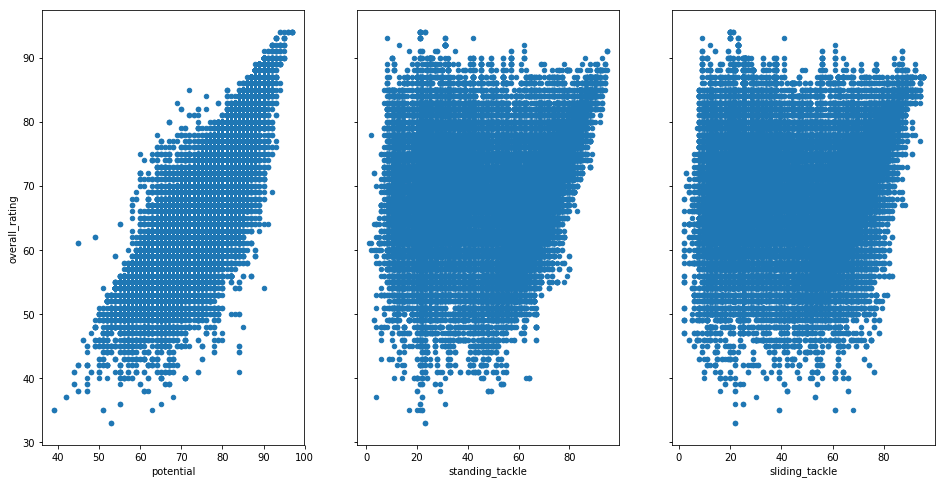

In [29]:
import matplotlib.pyplot as plt
# this allows plots to appear directly in the notebook
%matplotlib inline
fig, axs = plt.subplots(1, 3, sharey=True)
df.plot(kind='scatter', x='potential', y='overall_rating', ax=axs[0], figsize=(16, 8))
df.plot(kind='scatter', x='standing_tackle', y='overall_rating', ax=axs[1])
df.plot(kind='scatter', x='sliding_tackle', y='overall_rating', ax=axs[2])

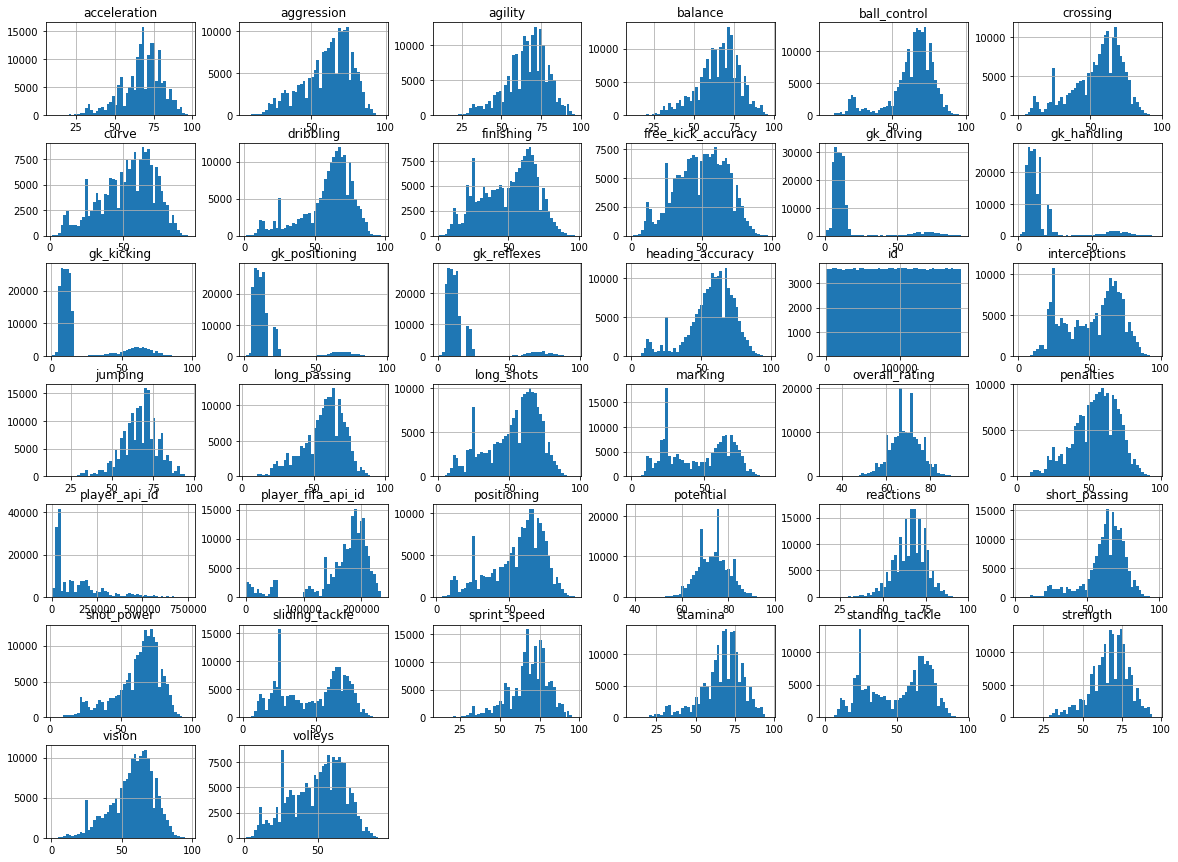

In [16]:
df.hist(bins=50, figsize=(20,15))
plt.show()

In [17]:
df.corr()

,id,player_fifa_api_id,player_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
id,1.000000,0.003744,0.002048,-0.003738,0.000837,-0.020231,-0.008171,-0.011781,-0.006701,-0.006916,...,-0.007928,-0.011751,-0.010329,-0.012515,-0.011101,0.014251,0.010911,0.008758,0.014015,0.014671
player_fifa_api_id,0.003744,1.000000,0.556557,-0.278703,-0.021252,-0.065631,-0.029836,-0.103500,-0.065311,-0.088726,...,-0.163099,-0.175255,-0.075568,-0.071128,-0.055218,-0.092945,-0.138844,-0.248222,-0.140925,-0.131531
player_api_id,0.002048,0.556557,1.000000,-0.328315,0.010588,-0.113365,-0.062312,-0.130282,-0.090237,-0.131262,...,-0.188087,-0.162481,-0.089772,-0.086706,-0.073595,-0.071825,-0.125345,-0.229704,-0.125525,-0.121947
overall_rating,-0.003738,-0.278703,-0.328315,1.000000,0.765435,0.357320,0.330079,0.313324,0.458243,0.361739,...,0.431493,0.392715,0.132185,0.163986,0.128054,0.027675,0.006717,0.028799,0.008029,0.007804
potential,0.000837,-0.021252,0.010588,0.765435,1.000000,0.277284,0.287838,0.206063,0.382538,0.301678,...,0.379278,0.315207,0.054094,0.082073,0.063284,-0.012283,0.005865,0.092299,0.004472,0.004936
crossing,-0.020231,-0.065631,-0.113365,0.357320,0.277284,1.000000,0.576896,0.368956,0.790323,0.637527,...,0.693978,0.574208,0.234886,0.285018,0.274673,-0.604567,-0.595646,-0.356728,-0.597742,-0.601696
finishing,-0.008171,-0.029836,-0.062312,0.330079,0.287838,0.576896,1.000000,0.373459,0.580245,0.851482,...,0.652376,0.726234,-0.285416,-0.230453,-0.262144,-0.479370,-0.465135,-0.292349,-0.470758,-0.473302
heading_accuracy,-0.011781,-0.103500,-0.130282,0.313324,0.206063,0.368956,0.373459,1.000000,0.548435,0.391129,...,0.336472,0.431291,0.460831,0.480054,0.441134,-0.665600,-0.649145,-0.402865,-0.648981,-0.652494
short_passing,-0.006701,-0.065311,-0.090237,0.458243,0.382538,0.790323,0.580245,0.548435,1.000000,0.639995,...,0.766401,0.612511,0.349578,0.415427,0.380148,-0.694111,-0.689874,-0.422659,-0.691030,-0.693260
volleys,-0.006916,-0.088726,-0.131262,0.361739,0.301678,0.637527,0.851482,0.391129,0.639995,1.000000,...,0.690716,0.713116,-0.170094,-0.108062,-0.127810,-0.508029,-0.486178,-0.279492,-0.490148,-0.492267


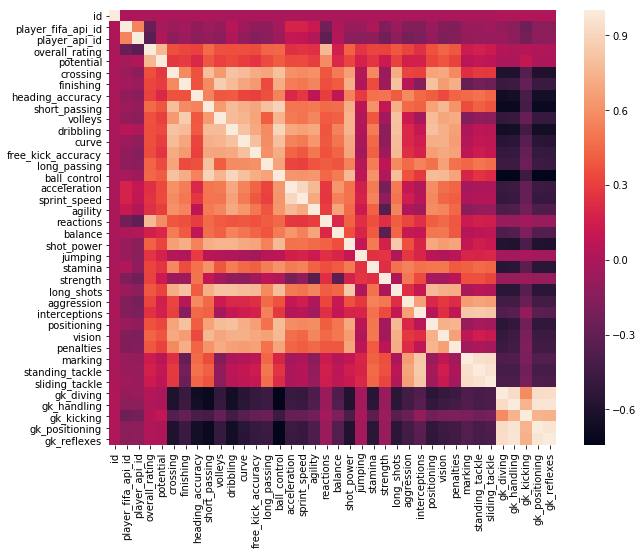

In [19]:
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(df.corr())

In [28]:
groups = df.groupby('attacking_work_rate')
df.attacking_work_rate.value_counts()
df.dropna(inplace=True)
df.attacking_work_rate.value_counts()

medium    125070
high       42823
low         8569
None        3317
norm         317
y             94
stoc          86
le            78
Name: attacking_work_rate, dtype: int64

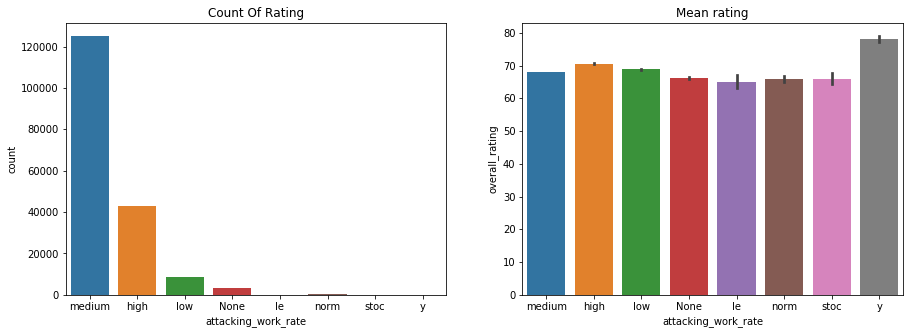

In [24]:
import numpy as np
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.countplot(df.attacking_work_rate)
plt.title('Count Of Rating')
plt.subplot(1,2,2)
sns.barplot(x='attacking_work_rate', y='overall_rating', data=df, estimator=np.mean)
plt.title('Mean rating')

In [45]:
import scipy.stats
#scipy.stats.ttest_ind(groups.get_group('medium')['attacking_work_rate'].values, groups.get_group('high')['attacking_work_rate'].values)

In [30]:
# create X and y
feature_cols = ['potential','positioning','vision']
df.dropna(inplace=True)
X = df[feature_cols]
y = df.overall_rating


# using sklearn linear regression ,build the model
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, y)
print(lm.intercept_)
print(lm.coef_)

9.14996334669
[ 0.74834427  0.0144558   0.06379657]


In [36]:
X = df.drop('overall_rating',axis=1)
X = df.drop(['attacking_work_rate','defensive_work_rate','preferred_foot','date'],axis=1)
Y = df['overall_rating']
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.2, random_state= 10)
print(train_x.shape)
print(train_y.shape)

(144283, 38)
(144283,)


In [31]:
X_new = pd.DataFrame({'crossing': [49],'standing_tackle': [66],'sliding_tackle': [69]})
X_new.head()
lm.predict(X_new)

array([ 51.02685629])

In [37]:
import statsmodels.api as sm
train_x = sm.add_constant(train_x)
test_x = sm.add_constant(test_x)
model = sm.OLS(train_y, train_x).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         overall_rating   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.982e+30
Date:                Sun, 28 Oct 2018   Prob (F-statistic):               0.00
Time:                        13:26:47   Log-Likelihood:             3.9523e+06
No. Observations:              144283   AIC:                        -7.904e+06
Df Residuals:                  144244   BIC:                        -7.904e+06
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -1.756e-13   1.24e-14    -14.203      0.000      -2e-13   -1.51e-13
id                 -2.303e-18   1.53e-20   -151.040      0.000   -2.33e-18   -2.27e-18
player_fifa_api_id  3.113e-18   2.01e-20    155.065      0.000    3.07e-18    3.15e-18
player_api_id      -5.087e-19   8.27e-21    -61.540      0.000   -5.25e-19   -4.93e-19
overall_rating         1.0000   3.07e-16   3.25e+15      0.000       1.000       1.000
potential          -2.637e-16   2.36e-16     -1.117      0.264   -7.26e-16    1.99e-16
crossing            8.127e-16   1.04e-16      7.795      0.000    6.08e-16    1.02e-15
finishing          -2.758e-16   1.14e-16     -2.422      0.015   -4.99e-16   -5.26e-17
heading_accuracy    1.041e-17   1.03e-16      0.101      0.919   -1.91e-16    2.12e-16
short_passing       8.431e-16   1.71e-16      4.920      0.000    5.07e-16    1.18e-15
volleys            -6.137e-17   1.02e-16     -0.602      0.547   -2.61e-16    1.39e-16
dribbling           1.162e-16   1.45e-16      0.802      0.423   -1.68e-16       4e-16
curve               4.085e-16   9.88e-17      4.134      0.000    2.15e-16    6.02e-16
free_kick_accuracy  1.301e-16   8.79e-17      1.481      0.139   -4.21e-17    3.02e-16
long_passing        4.857e-17   1.17e-16      0.416      0.677    -1.8e-16    2.77e-16
ball_control       -9.263e-16      2e-16     -4.636      0.000   -1.32e-15   -5.35e-16
acceleration       -9.021e-16   1.71e-16     -5.289      0.000   -1.24e-15   -5.68e-16
sprint_speed         -5.1e-16   1.62e-16     -3.150      0.002   -8.27e-16   -1.93e-16
agility            -2.212e-16   1.26e-16     -1.762      0.078   -4.67e-16    2.49e-17
reactions          -8.743e-16   1.47e-16     -5.929      0.000   -1.16e-15   -5.85e-16
balance             6.861e-16   9.69e-17      7.079      0.000    4.96e-16    8.76e-16
shot_power          1.991e-16   1.08e-16      1.837      0.066   -1.34e-17    4.12e-16
jumping             2.394e-16   9.02e-17      2.655      0.008    6.27e-17    4.16e-16
stamina            -3.608e-16   1.01e-16     -3.579      0.000   -5.58e-16   -1.63e-16
strength             3.43e-16   1.05e-16      3.261      0.001    1.37e-16    5.49e-16
long_shots          6.939e-18   1.13e-16      0.061      0.951   -2.15e-16    2.29e-16
aggression         -1.631e-16    8.5e-17     -1.918      0.055    -3.3e-16     3.6e-18
interceptions      -1.717e-16   9.15e-17     -1.876      0.061   -3.51e-16    7.65e-18
positioning         -2.09e-16   9.77e-17     -2.139      0.032   -4.01e-16   -1.75e-17
vision             -2.411e-16   1.09e-16     -2.211      0.027   -4.55e-16   -2.74e-17
penalties          -7.026e-17   9.28e-17     -0.757      0.449   -2.52e-16    1.12e-16
marking             1.381e-16   1.39e-16      0.995      0.320   -1.34e-16     4.1e-16
standing_tackle    -1.839e-16   1.61e-

In [ ]:
lm = LinearRegression()
model = lm.fit(train_x.values, train_y.values)
model.score(train_x, train_y)

In [38]:
from sklearn.metrics import mean_squared_error
import math
train_pred_y = model.predict(train_x)
test_pred_y = model.predict(test_x)
print('RMSE Train', math.sqrt(mean_squared_error(train_pred_y, train_y)))
print('RMSE Test' ,math.sqrt(mean_squared_error(test_pred_y, test_y)))

RMSE Train 3.0715262633962754e-13
RMSE Test 3.055062875187805e-13


(array([  2.00000000e+01,   1.41000000e+02,   3.71000000e+02,
          4.64000000e+02,   1.15300000e+03,   1.80400000e+03,
          1.96300000e+03,   2.92700000e+03,   3.79700000e+03,
          5.07500000e+03,   1.02590000e+04,   1.65020000e+04,
          2.07730000e+04,   1.78880000e+04,   2.03990000e+04,
          1.86770000e+04,   1.16950000e+04,   8.30300000e+03,
          1.93700000e+03,   1.35000000e+02]),
 array([ -6.39488462e-13,  -5.72697445e-13,  -5.05906428e-13,
         -4.39115411e-13,  -3.72324394e-13,  -3.05533376e-13,
         -2.38742359e-13,  -1.71951342e-13,  -1.05160325e-13,
         -3.83693077e-14,   2.84217094e-14,   9.52127266e-14,
          1.62003744e-13,   2.28794761e-13,   2.95585778e-13,
          3.62376795e-13,   4.29167812e-13,   4.95958830e-13,
          5.62749847e-13,   6.29540864e-13,   6.96331881e-13]),
 <a list of 20 Patch objects>)

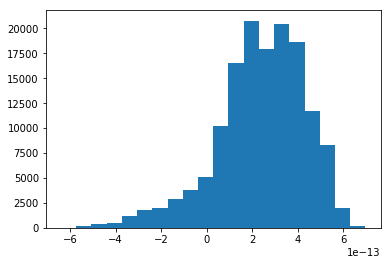

In [42]:
#plt.scatter(train_pred_y, train_y)
#plt.scatter(test_pred_y, test_y)
plt.hist(train_pred_y - train_y, bins=20)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.sort_values(by='VIF Factor' ,ascending=False)

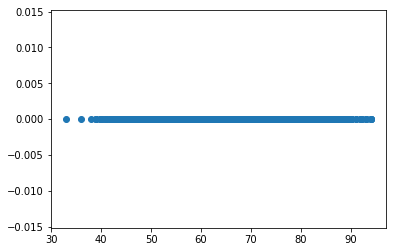

In [44]:
plt.scatter(test_y, test_y - test_pred_y)